<h1><center> E-Commerce Customer Churn Analysis Using SQL </center></h1>

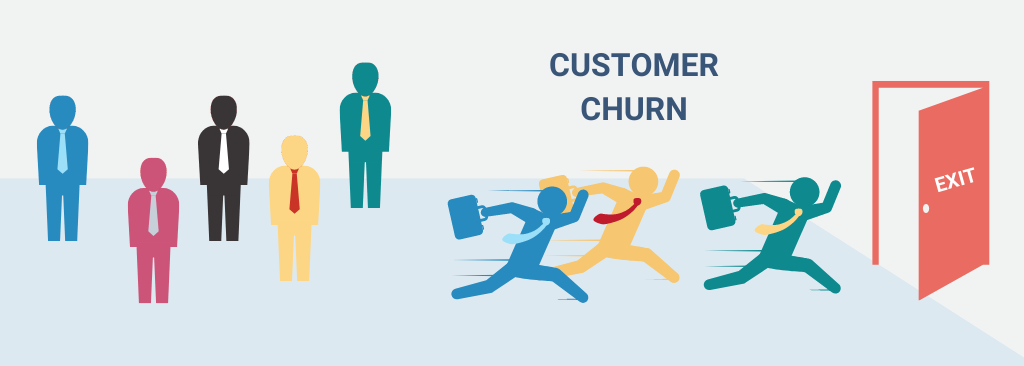

## Problem Statement

Customer churn, defined as the percentage of customers who stop engaging with a business over a given period, is a critical metric for e-commerce businesses. High churn rates directly impact profitability and long-term growth, making it essential to understand and address the underlying factors driving customer attrition.

This project focuses on analyzing churn trends and identifying key drivers using SQL. The goal is to provide actionable insights to help the business reduce churn, improve customer satisfaction, and strengthen loyalty.

<br>
<br>

## Data Dictionary 


| **Sr. No.** | **Feature**               | **Description**                                                                |
| :-         | :-                           | :-                                                                             |
| 1          | `CustomerID`                 | Unique identifier for each customer.                                           |
| 2          | `Churn`                      | Indicates whether the customer has churned (1 = churned, 0 = not churned).     |
| 3          | `Tenure`                     | The number of months the customer has been associated with the business.       |
| 4          | `PreferredLoginDevice`       | The device type most commonly used by the customer to access the platform.     |
| 5          | `CityTier`                   | The tier classification of the customer’s city (e.g., Tier 1, Tier 2, etc.).   |
| 6          | `WarehouseToHome`            | Average distance (in kilometers) from the warehouse to the customer’s home.    |
| 7          | `PreferredPaymentMode`       | The customer’s preferred payment method (e.g., Cash on Delivery, Credit Card). |
| 8          | `Gender`                     | Gender of the customer (e.g., Male, Female).                                   |
| 9          | `HourSpendOnApp`             | Average number of hours spent by the customer on the app per session.          |
| 10         | `NumberOfDeviceRegistered`   | Total number of devices registered by the customer on the platform.            |
| 11         | `PreferedOrderCat`           | The product category most frequently ordered by the customer.                  |
| 12         | `SatisfactionScore`          | Customer’s satisfaction score (on a scale of 1 to 5).                          |
| 13         | `MaritalStatus`              | Marital status of the customer (e.g., Single, Married, Divorced).              |
| 14         | `NumberOfAddress`            | Total number of addresses registered by the customer.                          |
| 15         | `Complain`                   | Number of complaints filed by the customer.                                    |
| 16         | `OrderAmountHikeFromlastYear`| Percentage increase in the order amount compared to the previous year.         |
| 17         | `CouponUsed`                 | Total number of coupons used by the customer.                                  |
| 18         | `OrderCount`                 | Total number of orders placed by the customer.                                 |
| 19         | `DaySinceLastOrder`          | Number of days since the customer last placed an order.                        |
| 20         | `CashbackAmount`             | Total cashback amount received by the customer.                                |


<br>
<br>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import mysql.connector

conn = mysql.connector.connect(host='localhost', user='root', password='', database='e_commerce')

In [3]:
pd.read_sql_query('SELECT * FROM churn_analysis_staging', conn).sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4703,54705,0,21,Computer,3,10,Credit Card,Female,3,4,Grocery,3,Married,11,1,13,0,12,14,263
5146,55148,0,25,Computer,3,9,E wallet,Male,3,4,Fashion,4,Married,4,0,12,4,4,7,231
4152,54154,0,5,Computer,1,12,Credit Card,Male,4,4,Laptop & Accessory,5,Single,2,0,20,1,2,7,224
3406,53408,0,1,Phone,1,23,Cash on Delivery,Female,3,4,Mobile,4,Divorced,11,0,15,3,3,3,153
2335,52337,0,5,Phone,3,8,E wallet,Male,2,3,Laptop & Accessory,4,Married,1,1,13,1,1,2,141


<br>
<br>

## 1. What is the overall churn rate?

In [4]:
churn_rate = pd.read_sql_query(
    """SELECT ROUND(SUM(CASE WHEN Churn = 1 THEN 1 END) / COUNT(*)*100,2) AS 'churn_rate' 
    FROM e_commerce.churn_analysis_staging""", conn).values[0][0]

print('Overall Churn Rate:',churn_rate, '%')

Overall Churn Rate: 16.82 %


### Observation:

- A **churn rate** of **16.82%** highlights the **need to focus on retention**. **Identifying and addressing key drivers of churn** can help **reduce this rate and improve overall revenue**.

<br>

## 2. Is there any difference in churn rate between male and female customers?

In [5]:
pd.read_sql_query("""
        SELECT 
            Gender,
            COUNT(*) AS Total_Customers,
            SUM(Churn) AS Churned_Customers,
            ROUND(SUM(Churn) / COUNT(*) * 100, 2) AS Churn_Rate_Percentage
        FROM 
            churn_analysis_staging
        GROUP BY 
            Gender
        ORDER BY 
            Churn_Rate_Percentage DESC
""", conn)

,Gender,Total_Customers,Churned_Customers,Churn_Rate_Percentage
0,Male,3383,599.0,17.71
1,Female,2246,348.0,15.49


### Observations:

- `Male`: Churn rate is **17.71%**, indicating **higher risk**.
- `Female`: Churn rate is **15.49%**, showing **lower risk** but **still notable**.

**Male customers** are **more likely to churn**, requiring **targeted retention efforts**.

<br>

## 3. Does the marital status of customers influence churn behavior?

In [6]:
pd.read_sql_query("""
            SELECT 
                MaritalStatus,
                COUNT(*) AS Total_Customers,
                SUM(Churn) AS Churned_Customers,
                ROUND(SUM(Churn) / COUNT(*) * 100, 2) AS Churn_Rate_Percentage
            FROM 
                churn_analysis_staging
            GROUP BY 
                MaritalStatus
            ORDER BY 
                Churn_Rate_Percentage DESC
""", conn)

,MaritalStatus,Total_Customers,Churned_Customers,Churn_Rate_Percentage
0,Single,1796,480.0,26.73
1,Divorced,848,124.0,14.62
2,Married,2985,343.0,11.49


### Observations:

- `Single Customers`: **Highest** churn rate at **26.73%**, indicating they are at the **greatest risk of leaving**.
- `Divorced Customers`: **Moderate** churn rate at **14.62%**, showing **notable risk** but lower than single customers.
- `Married Customers`: **Lowest** churn rate at **11.49%**, demonstrating **greater loyalty** compared to other groups.

**Single customers** are **most likely to churn**, while **married customers** are the **most loyal**. **Retention strategies** should **focus on engaging single customers** to **reduce churn**.

<br>

## 4. How does churn vary by tenure?

In [7]:
pd.read_sql_query("""
        SELECT 
            CASE 
                WHEN Tenure < 6 THEN '0-6 months'
                WHEN Tenure >= 6 AND Tenure < 12 THEN '6-12 months'
                WHEN Tenure >= 12 AND Tenure < 24 THEN '12-24 months'
                ELSE '24+ months'
            END AS Tenure_Group,
            COUNT(*) AS Total_Customers,
            SUM(Churn) AS Total_Churned,
            (SUM(Churn) / COUNT(*)) * 100 AS Churn_Rate
        FROM 
            churn_analysis_staging
        GROUP BY 
            Tenure_Group
""", conn)

,Tenure_Group,Total_Customers,Total_Churned,Churn_Rate
0,0-6 months,1966,688.0,34.9949
1,6-12 months,1585,157.0,9.9054
2,12-24 months,1574,102.0,6.4803
3,24+ months,504,0.0,0.0000


### Observation:

- `**0-6 months**`: **High churn rate** of **34.99%** indicates **many new customers are leaving**. **Improving onboarding and early engagement** is crucial.

- `**6-12 months**`: Churn **drops to 9.91%**, showing that those who **stay past six months** are **finding value but still need support**.

- `**12-24 months**`: Churn further **decreases to 6.48%**, suggesting **long-term customers are generally satisfied**.

- `**24+ months**`: A **0% churn rate** shows that **loyal customers are very satisfied**.

<br>

## 5. What is the distribution of customers across different city tiers?

In [8]:
pd.read_sql_query("""
        SELECT 
            CityTier,
            COUNT(*) AS Total_Customers,
            SUM(Churn) AS Churned_Customers,
            ROUND(SUM(Churn) / COUNT(*) * 100, 2) AS Churn_Rate_Percentage
        FROM 
            churn_analysis_staging
        GROUP BY 
            CityTier
        ORDER BY 
            Churn_Rate_Percentage DESC
""", conn)

,CityTier,Total_Customers,Churned_Customers,Churn_Rate_Percentage
0,3,1721,367.0,21.32
1,2,242,48.0,19.83
2,1,3666,532.0,14.51


### Observations:

- `Tier 3 Cities`: Highest churn rate at **21.32**%, indicating that customers in these cities are at the **highest risk of leaving**.
- `Tier 2 Cities`: Moderate churn rate at **19.83%**, suggesting **notable risk**, though lower than Tier 3.
- `Tier 1 Cities`: Lowest churn rate at **14.51%**, showing that customers in these cities are **more loyal** compared to other tiers.

**Tier 3** cities have the **highest churn rate**, indicating a need for **targeted retention strategies**. **Tier 1 cities** exhibit relatively **lower churn**, suggesting stronger customer loyalty.

<br>

## 6. How does customer satisfaction score affect churn?

In [9]:
pd.read_sql_query("""
                    SELECT 
                        SatisfactionScore,
                        COUNT(*) AS Total_Customers,
                        SUM(Churn) AS Total_Churned,
                        (SUM(Churn) / COUNT(*)) * 100 AS Churn_Rate
                    FROM 
                        churn_analysis_staging
                    GROUP BY 
                        SatisfactionScore
                    ORDER BY 
                        SatisfactionScore
""", conn)

,SatisfactionScore,Total_Customers,Total_Churned,Churn_Rate
0,1,1164,134.0,11.5120
1,2,586,74.0,12.6280
2,3,1697,291.0,17.1479
3,4,1074,184.0,17.1322
4,5,1108,264.0,23.8267


### Observation:

- **Satisfaction Score 1**: Churn rate is 11.51%.
- **Satisfaction Score 2**: Churn increases to 12.63%.
- **Satisfaction Score 3**: Churn rises to 17.15%, indicating a notable risk of churn.
- **Satisfaction Score 4**: Churn rate is 17.13%, showing continued risk.
- **Satisfaction Score 5**: Highest churn at 23.83%, suggesting potential issues.

<br>

## 7. Is there any correlation between the warehouse-to-home distance and customer churn?

In [10]:
pd.read_sql_query("""
        SELECT 
            CASE 
                WHEN WarehouseToHome BETWEEN 1 AND 10 THEN 'Very Close'
                WHEN WarehouseToHome BETWEEN 11 AND 20 THEN 'Close'
                WHEN WarehouseToHome BETWEEN 21 AND 30 THEN 'Moderate Distance'
                WHEN WarehouseToHome BETWEEN 31 AND 40 THEN 'Far'
                ELSE 'Other'
            END AS Distance_Bucket,
            COUNT(*) AS Total_Customers,
            SUM(Churn) AS Churned_Customers,
            ROUND(SUM(Churn) / COUNT(*) * 100, 2) AS Churn_Rate_Percentage
        FROM 
            churn_analysis_staging
        GROUP BY 
            Distance_Bucket
        ORDER BY 
            Churn_Rate_Percentage DESC
""", conn)

,Distance_Bucket,Total_Customers,Churned_Customers,Churn_Rate_Percentage
0,Moderate Distance,1125,260.0,23.11
1,Far,469,98.0,20.90
2,Close,2067,324.0,15.67
3,Very Close,1968,265.0,13.47


### Observations:

- `Moderate Distance (1-10)`: Highest churn rate at **23.11%**, indicating customers with this distance are at the **greatest risk of churning**.
- `Far (11-20)`: Second highest churn rate at **20.90%**, suggesting a **significant risk** for customers in this range.
- `Close (11-20 km)`: Churn rate of **15.67%**, which is relatively **lower than the "Moderate" and "Far" categories** but still indicates a **noticeable churn risk**.
- `Very Close (1-10 km)`: Lowest churn rate at **13.47%**, showing that customers in this category are the **least likely to churn**.

Customers located at **moderate** and **far distances** have the **highest churn rates**, while those **closer to the warehouse (very close) show the most loyalty**. Retention strategies should focus on reducing churn for moderate and far distance customers.

<br>

## 8. Which payment methods have the highest churn rates?

In [11]:
pd.read_sql_query("""
                    SELECT 
                    PreferredPaymentMode,
                    COUNT(*) AS Total_Customers,
                    SUM(Churn) AS Total_Churned,
                    (SUM(Churn) / COUNT(*)) * 100 AS Churn_Rate
                FROM 
                    churn_analysis_staging
                GROUP BY 
                    PreferredPaymentMode
                ORDER BY 
                    Churn_Rate DESC
""", conn)

,PreferredPaymentMode,Total_Customers,Total_Churned,Churn_Rate
0,Cash on Delivery,514,128.0,24.9027
1,E wallet,614,140.0,22.8013
2,UPI,414,72.0,17.3913
3,Debit Card,2313,355.0,15.3480
4,Credit Card,1774,252.0,14.2052


## Observation:

- The **most preferred payment mode** among **churned customers** is **Cash on Delivery**.
- A **significant number of churned customers** also favored **E Wallet** as their payment method.
- **UPI** is the **third most common payment option** among **customers who have churned**.
- **Debit Card** and **Credit Card** users show **lower churn rates** compared to other payment methods.

<br>

## 9. Are customers who file complaints more likely to churn?

In [12]:
pd.read_sql_query("""
                SELECT 
                    Complain,
                    COUNT(*) AS Total_Customers,
                    SUM(Churn) AS Total_Churned,
                    (SUM(Churn) / COUNT(*)) * 100 AS Churn_Rate
                FROM 
                    churn_analysis_staging
                GROUP BY 
                    Complain
                ORDER BY 
                    Churn_Rate DESC
""", conn)

,Complain,Total_Customers,Total_Churned,Churn_Rate
0,1,1604,508.0,31.6708
1,0,4025,439.0,10.9068


## Observation:

- **Customers who filed complaints** have a **churn rate of 31.67%**, indicating a **strong correlation with higher churn**.
- **Customers who did not file complaints** show a **much lower churn rate of 10.91%**, suggesting they **tend to remain loyal**.
- These findings suggest that **customers who raise complaints** are **significantly more likely to churn** compared to those who do not.

---

## 10. Is there a relationship between the number of devices registered and churn?

In [13]:
pd.read_sql_query("""
            SELECT 
                NumberOfDeviceRegistered,
                COUNT(*) AS Total_Customers,
                SUM(Churn) AS Total_Churned,
                (SUM(Churn) / COUNT(*)) * 100 AS Churn_Rate
            FROM 
                churn_analysis_staging
            GROUP BY 
                NumberOfDeviceRegistered
            ORDER BY 
                Churn_Rate DESC
""", conn)

,NumberOfDeviceRegistered,Total_Customers,Total_Churned,Churn_Rate
0,6,162,56.0,34.5679
1,5,881,198.0,22.4745
2,4,2376,391.0,16.4562
3,3,1699,254.0,14.9500
4,2,276,26.0,9.4203
5,1,235,22.0,9.3617


### Observations:

- Customers with **6 devices registered** have the **highest churn rate** at **34.57%**.
- Churn rate **decreases** as the **number of devices registered drops**, with **5 devices at 22.47%** and **4 devices at 16.46%**.
- Customers with **1 or 2 devices** have the **lowest churn rates** at around **9.4%**.

This suggests that customers with more devices registered are more likely to churn.

<br>

## 11. How does the average time spent on the app differ for churned and non-churned customers?

In [14]:
pd.read_sql_query("""
    SELECT 
        Churn,
        ROUND(AVG(HourSpendOnApp), 2) AS Avg_Time_Spent
    FROM 
        churn_analysis_staging
    GROUP BY 
        Churn
""", conn)

,Churn,Avg_Time_Spent
0,1,2.97
1,0,2.93


### Observations:

- `Churned Customers`: Spend an average of **2.97** hours on the app.
- `Non-Churned Customers`: Spend slightly less, averaging **2.93** hours on the app.

Time spent on the app may not be a significant factor influencing churn.

<br>

## 12. Do customers with a higher "Order Amount Hike from Last Year" churn more frequently?

In [15]:
pd.read_sql_query("""
               SELECT 
                    CASE 
                        WHEN OrderAmountHikeFromlastYear BETWEEN 11 AND 15 THEN '11-15'
                        WHEN OrderAmountHikeFromlastYear BETWEEN 16 AND 20 THEN '16-20'
                        WHEN OrderAmountHikeFromlastYear BETWEEN 21 AND 26 THEN '21-26'
                        ELSE 'Other'
                    END AS OrderAmountHikeBucket,
                    COUNT(*) AS Total_Customers,
                    SUM(Churn) AS Churned_Customers,
                    ROUND(SUM(Churn) / COUNT(*) * 100, 2) AS Churn_Rate_Percentage
                FROM 
                    churn_analysis_staging
                GROUP BY 
                    OrderAmountHikeBucket
                ORDER BY 
                    OrderAmountHikeBucket

""", conn)

,OrderAmountHikeBucket,Total_Customers,Churned_Customers,Churn_Rate_Percentage
0,11-15,3416,565.0,16.54
1,16-20,1505,248.0,16.48
2,21-26,708,134.0,18.93


### Observations:

- `11-15% Hike`: Churn rate is **16.54%**, indicating a **moderate churn risk**.
- `16-20% Hike`: Slightly lower churn rate at **16.48%**, showing **minimal impact** from this range.
- `21-26% Hike`: Highest churn rate at **18.93%**, suggesting customers in this group are **most likely to churn**.

**Higher order amount hikes (21-26%)** correlate with an **increased churn rate**, indicating that steep price increases may drive customer dissatisfaction.

<br>

## 13. Does the amount of cashback a customer receives reduce churn?

In [16]:
pd.read_sql_query("""
            SELECT 
                CASE 
                    WHEN CashbackAmount BETWEEN 0 AND 50 THEN '0-50'
                    WHEN CashbackAmount BETWEEN 51 AND 100 THEN '51-100'
                    WHEN CashbackAmount BETWEEN 101 AND 200 THEN '101-200'
                    WHEN CashbackAmount > 200 THEN '>200'
                    ELSE 'Unknown'
                END AS CashbackBucket,
                COUNT(*) AS Total_Customers,
                SUM(Churn) AS Churned_Customers,
                ROUND(SUM(Churn) / COUNT(*) * 100, 2) AS Churn_Rate_Percentage
            FROM 
                churn_analysis_staging
            GROUP BY 
                CashbackBucket
            ORDER BY 
                Churn_Rate_Percentage
""", conn)

,CashbackBucket,Total_Customers,Churned_Customers,Churn_Rate_Percentage
0,0-50,10,0.0,0.00
1,51-100,2,0.0,0.00
2,>200,1312,133.0,10.14
3,101-200,4305,814.0,18.91


### Observations:

- `0-50 Cashback`: Churn rate is **0%** with **10 customers**, but the **number of customers** in this category is **very small** compared to others.
- `51-100 Cashback`: Similarly, **0%** churn for **2 customers**, but this group is too small to draw meaningful conclusions.
- `101-200 Cashback`: This category includes the **largest group with 4,305 customers** and a churn rate of **18.91%**, indicating a **high churn risk**.
- `>200 Cashback`: **With 1,312 customers**, this group has the **lowest churn rate at 10.14%**, showing that **higher cashback incentives may reduce churn**.

While the **101-200 cashback group** has the **highest churn rate**, customers receiving **>200 cashback** are **less likely to churn**. This indicates that **higher cashback incentives** are **effective in improving customer retention**.

---

## 14. Which product categories (e.g., Mobile, Fashion, Laptop & Accessory) have the highest churn rates?

In [17]:
pd.read_sql_query("""
        SELECT 
            PreferedOrderCat AS ProductCategory,
            COUNT(*) AS Total_Customers,
            SUM(Churn) AS Churned_Customers,
            ROUND(SUM(Churn) / COUNT(*) * 100, 2) AS Churn_Rate_Percentage
        FROM 
            churn_analysis_staging
        GROUP BY 
            PreferedOrderCat
        ORDER BY 
            Churn_Rate_Percentage DESC
""", conn)

,ProductCategory,Total_Customers,Churned_Customers,Churn_Rate_Percentage
0,Mobile,2080,570.0,27.40
1,Fashion,825,127.0,15.39
2,Laptop & Accessory,2050,210.0,10.24
3,Others,264,20.0,7.58
4,Grocery,410,20.0,4.88


### Observations:

- `Mobile`: Highest churn rate at **27.40%** with **2,080 customers**, indicating this category faces the **most significant churn issues**.
- `Fashion`: Churn rate is **15.39%**, which is **moderate** compared to Mobile but still noteworthy.
- `Laptop & Accessory`: Churn rate is **10.24%**, showing relatively better customer retention.
- `Others`: Lower churn rate of **7.58%**, indicating good retention in this category.
- `Grocery`: Lowest churn rate at **4.88%**, suggesting customers are most loyal in this category.

**Mobile products** have the **highest churn rate**, requiring **immediate attention** to **improve retention**. **Grocery** and **Others** categories demonstrate **strong customer loyalty**.

<br>

## 15. What role does the customer’s preferred login device (e.g., Phone vs. Computer) play in churn?

In [18]:
pd.read_sql_query("""
    SELECT 
        PreferredLoginDevice AS LoginDevice,
        COUNT(*) AS Total_Customers,
        SUM(Churn) AS Churned_Customers,
        ROUND(SUM(Churn) / COUNT(*) * 100, 2) AS Churn_Rate_Percentage
    FROM 
        churn_analysis_staging
    GROUP BY 
        PreferredLoginDevice
    ORDER BY 
        Churn_Rate_Percentage DESC
""", conn)

,LoginDevice,Total_Customers,Churned_Customers,Churn_Rate_Percentage
0,Computer,1634,324.0,19.83
1,Phone,3995,623.0,15.59


### Observations:

- `Computer`: Churn rate is **19.83%** with **1,634 customers**, indicating a higher likelihood of churn compared to Phone users.
- `Phone`: Churn rate is lower at **15.59%**, with a significantly **larger customer base of 3,995 customers**.

Customers using **Computers** as their login device are **more likely to churn** compared to Phone users, suggesting a need to **optimize the experience for computer-based customers**.

<br>
<br>
<br>

# Key Insights

1. **Churn rate** is **16.82%**, highlighting the need for **better retention** strategies.

2. **Male customers** have a **higher churn rate** (17.71%) than females (15.49%), needing **targeted retention**.

3. **Single customers** have the highest churn at **26.73%**, while **married customers** are the most **loyal** (11.49%).

4. **New customers (0-6 months)** show a **high churn rate** of **34.99%**, needing **strong onboarding**.

5. **Tier 3 cities** face the highest churn at **21.32%**, requiring **focused retention efforts**.

6. **Low satisfaction** scores lead to **higher churn**, especially with score **5** at **23.83%**.

7. **Moderate and far distance** customers show **high churn rates**, needing **distance-based retention**.

8. **Cash on Delivery** and **E Wallet** are the **preferred payment methods** for churned customers.

9. **Complaints** increase churn to **31.67%**, suggesting **faster issue resolution** can reduce churn.

10. Customers with **6 devices** have the **highest churn rate** (34.57%), while **1-2 devices** show the **lowest** (9.4%).

11. **Higher cashback** (over ₹200) reduces churn to **10.14%**, highlighting **cashback's role in retention**.

12. **Mobile products** have the highest churn at **27.40%**, while **grocery products** show the lowest churn at **4.88%**.

13. **Computer users** have a **higher churn** (19.83%) than **phone users** (15.59%), indicating the need for **better computer-based experiences**.
